#### Michael Perrine
#### Week 9-10 Assignment
#### DSC 540 Data Preparation  
#### Professor Williams

<h1><center>Activity 7.01</center></h1>

In [14]:
# import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import googlemaps
import pprint
import urllib.request, urllib.parse, urllib.error
import json
from dotenv import load_dotenv
import os

In [ ]:
# This saves the website url for call
url = 'https://www.gutenberg.org/browse/scores/top'

In [ ]:
# This code saves the url to a response object
data = requests.get(url)


In [ ]:
# This code creates a function to check connection to link
def status_check(r):
    if r.status_code==200:
        print('Good')
        return 1
    else:
        print('No good')
        return -1
        
        

In [ ]:
# This code calls the function and produces either a good or no good response
status_check(data)

Good


1

In [ ]:
# This code calls the website html and parses the data
books = data.content.decode(data.encoding)
soup = BeautifulSoup(books, 'html.parser')


In [ ]:
# This code prints the html and gives proper indents for better readability
print(soup.prettify())

In [ ]:
# This code finds all the book links and appends it to the data_links list
data_links = []

for link in soup.find_all('a'):
    data_links.append(link.get('href'))

In [ ]:
# This code prints the list
data_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/categories',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 'pretty-pictures',
 '#books-last1']

In [ ]:
# This code pulls a list of book numbers and appends it to the book_numbers list
book_numbers = []

for i in range(19, 119):
    link = data_links[i]
    link = link.strip()
    n = re.findall('[0-9]+', link)
    if len(n)==1:
        book_numbers.append(int(n[0]))
    
    

In [ ]:
# This code prints the book numbers
print('\n The file numbers for the top 100 ebooks are\n' +'-'* 510)
print(book_numbers)


 The file numbers for the top 100 ebooks are
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 84, 2701, 1023, 1342, 1513, 11, 2542, 64317, 844, 100, 145, 174, 2641, 37106, 43, 67979, 16389, 2554, 345, 98, 394, 21144, 6761, 2160, 4085, 1259, 6593, 5197, 1998, 1260, 5200, 1400, 76, 1080, 21143, 26184, 16328, 1661, 1232, 3207, 28054, 25344, 1952, 3296, 41445, 2000, 4300, 76087, 45, 2591, 205, 76086, 1184, 6130, 74, 768, 34901, 4363, 1727, 36034, 135, 219, 2600, 408, 5740, 7370, 3201, 8800, 2650, 8492, 1600, 1497, 

In [ ]:
# This code prints the top 100 books
print(soup.text[:2000])

In [ ]:
# This code creates an empty list for the book titles
book_titles = []

In [ ]:
# This code splits the titles into different lines
title_index = soup.text.splitlines().index('Top 100 EBooks yesterday')

In [ ]:
# This code appends the book titles to the list
for i in range(100):
    book_titles.append(soup.text.splitlines()[title_index+2+i])

In [32]:
new_book_titles = []
for i in range(100):
    id1,id2 = re.match('^[a-zA-Z]*', book_titles[i]).span()
    new_book_titles.append(book_titles[i][id1:id2])
    

In [ ]:
# This code iterates through the list and prints the book titles
for l in new_book_titles:
    print(l)

Frankenstein
Moby
Bleak
Pride
Romeo
Alice
A
The
The
The
Middlemarch
The
A
Little
The
The
The
Crime
Dracula
A
Cranford
Las
The
The
The
Twenty
History
My
Thus
Jane
Metamorphosis
Great
Adventures
A
Las
Simple
Beowulf
The
The
Leviathan
The
The
The
The
Frankenstein
Don
Ulysses
A
Anne
Grimms
Walden
Garry
The
The
The
Wuthering
On
Beyond
The
White
Les
Heart
War
The
Tractatus
Second
Moby
The
Du
The
Symposium
The
The
Rival
A
A
The
The
Little
A
Oliver
The
The
The
Treasure
Dubliners
Doctrina
The
Gulliver
Le
Las
Emma
The
Don
An
One
The
The
The
Plays


<h1><center>Activity 7.02</center></h1>

In [13]:
load_dotenv()

True

In [47]:
#This code opens and reads the api keys file
with open (r"APIkeys.json") as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [48]:
# This code creates an object to store the web address
url= 'https://www.omdbapi.com/?'

In [ ]:
# This code stores the api key 
api= os.getenv('API_KEY_1')

In [49]:
# This code creates a key for movie features
def print_json(json_data):
    list_keys = ['Title', 'Year', 'Rated', 'Released',
                'Runtime', 'Genre', 'Director', 'Writer',
                'Actors', 'Plot', 'Language', 'Country',
                'Awards', 'Ratings', 'Metascore', 'imdbRating',
                'imdbVotes', 'imdbID']
    print('-'*25)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print('-'*25)
    

In [50]:
# This code creates a function to pull data from the website
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    poster_file_extension=poster_url.split('.')[-1]
    poster_data = urllib.request.urlopen(poster_url).read()
    
    save_location=os.getcwd()+'\\'+'Posters'+'\\'
    if not os.path.isdir(save_location):
        os.mkdir(save_location)
        
    file_name=save_location+str(title)+'.'+poster_file_extension
    f=open(file_name, 'wb')
    f.write(poster_data)
    f.close()

In [51]:
# This code creates a function that searches the movie database 
# and provides either the movie data or a failure response

def search_movie(title):
    try:
        url_movie = url+ urllib.parse.urlencode({'t': str(title)})+api
        print(f'Acquiring movie data"{title}"...')
        print(url_movie)
        uh = urllib.request.urlopen(url_movie)
        data = uh.read()
        json_data = json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            
            if json_data['Poster']!='N/A':
                save_poster(json_data)
                
        else:
            print('Failure!: ', json_data['ERROR'])
    
    except urllib.error.URLError as e:
        print(f'ERROR: {e.reason}')        

In [52]:
# This code calls movie data
search_movie('Titanic')

Acquiring movie data"Titanic"...
https://www.omdbapi.com/?t=TitanicAIzaSyABHacnwGG_yVv-afZV_8jsVNpErCXztE8
ERROR: Unauthorized


In [53]:
# This code forces an error
search_movie('random_error')

Acquiring movie data"random_error"...
https://www.omdbapi.com/?t=random_errorAIzaSyABHacnwGG_yVv-afZV_8jsVNpErCXztE8
ERROR: Unauthorized


<h1><center> API Assignment</center></h1>

In [ ]:
# This code stores the google api key
api_key ="API_KEY" 

In [ ]:
# This code creates a connection with the google maps client 
map_client = googlemaps.Client(api_key)

In [ ]:
# This code stores my address
address = 

In [ ]:
# This code creates a response object to locate my address
response = map_client.geocode(address)

In [ ]:
# This code prints my address information
pprint.pprint(response)

[{'address_components': [{'long_name': '1023',
                          'short_name': '1023',
                          'types': ['street_number']},
                         {'long_name': 'Cerro Alto Drive',
                          'short_name': 'Cerro Alto Dr',
                          'types': ['route']},
                         {'long_name': 'San Antonio International Airport '
                                       'Vicinity',
                          'short_name': 'San Antonio International Airport '
                                        'Vicinity',
                          'types': ['neighborhood', 'political']},
                         {'long_name': 'San Antonio',
                          'short_name': 'San Antonio',
                          'types': ['locality', 'political']},
                         {'long_name': 'Bexar County',
                          'short_name': 'Bexar County',
                          'types': ['administrative_area_level_2',
              

In [ ]:
# This code prints the latitude and longitude of my address
print(response[0]['navigation_points'])

[{'location': {'latitude': 29.5378494, 'longitude': -98.5092626}}]


<h1><center>Data Visualization</center></h1>

In [ ]:
# This code reads in the file and stores it in the sales object. 
# It also displays the first five rows.
sales= pd.read_excel(r"Customer_demographics_and_sales_Lab5.xlsx")
sales.head()

,CUST_NAME,Gender_Code,ADDRESS1,CITY,STATE,COUNTRY_CODE,POSTAL_CODE,POSTAL_CODE_PLUS4,ADDRESS2,EMAIL_ADDRESS,...,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
0,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0.0,NaN,Allen.M.Perl@spambob.com,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0.0,NaN,Allen.M.Perl@spambob.com,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0.0,NaN,Allen.M.Perl@spambob.com,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0.0,NaN,Allen.M.Perl@spambob.com,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0.0,NaN,Allen.M.Perl@spambob.com,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# This code displays the list of columns and data types in the dataframe
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_NAME            194 non-null    object        
 1   Gender_Code          194 non-null    object        
 2   ADDRESS1             194 non-null    object        
 3   CITY                 194 non-null    object        
 4   STATE                158 non-null    object        
 5   COUNTRY_CODE         194 non-null    object        
 6   POSTAL_CODE          194 non-null    object        
 7   POSTAL_CODE_PLUS4    194 non-null    float64       
 8   EMAIL_ADDRESS        194 non-null    object        
 9   PHONE_NUMBER         194 non-null    object        
 10  CREDITCARD_TYPE      194 non-null    object        
 11  SALESMAN_ID          194 non-null    object        
 12  NATIONALITY          194 non-null    object        
 13  NATIONAL_ID          194 non-null  

In [ ]:
# This code drops rows with null values
sales.drop(columns=['LOCALITY', 'DRIVER_LICENSE', 'ADDRESS2'], axis= 1, inplace=True)

Text(0.5, 0, 'State')

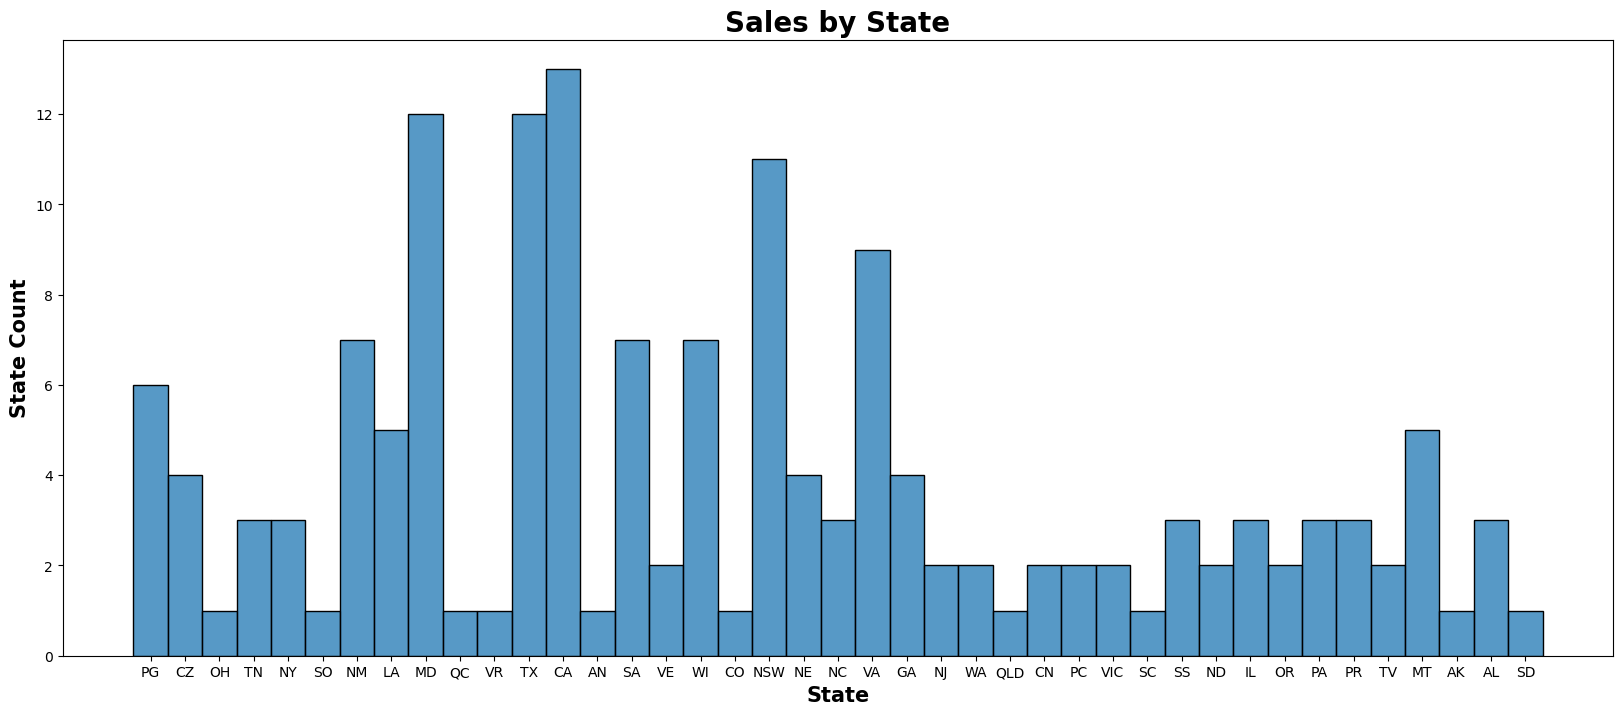

In [ ]:
# This code displays a histogram of the sales by state
plt.figure(figsize= (20,8))
sns.histplot(sales, x ='STATE', bins=50)
plt.title('Sales by State', fontsize= 20, weight= 'bold')
plt.ylabel('State Count', fontsize = 15, weight = 'bold')
plt.xlabel('State', fontsize = 15, weight = 'bold')

Text(0.5, 0, 'Freight Charges')

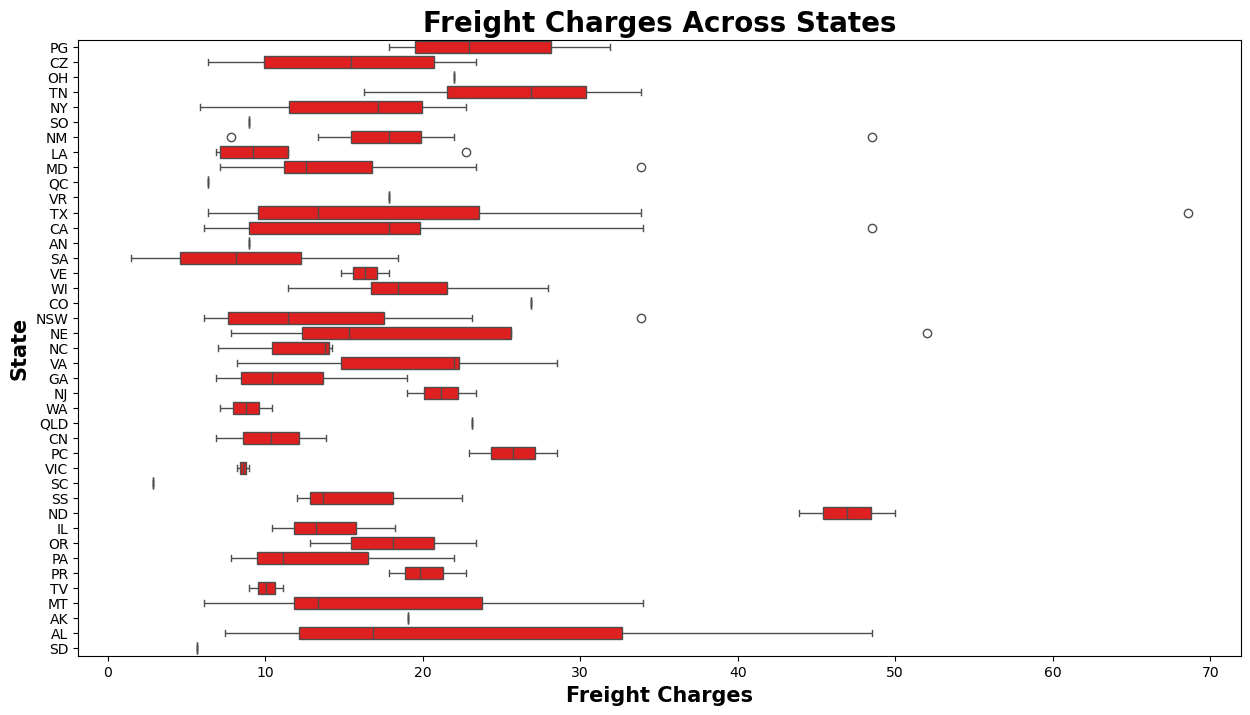

In [ ]:
# This code creates a box plot comparing the freight charges across states
plt.figure(figsize=(15,8))
sns.boxplot(sales, x = 'FREIGHT_CHARGES', y = 'STATE', color= 'red' )
plt.title('Freight Charges Across States', fontsize = 20, weight = 'bold')
plt.ylabel('State', fontsize = 15, weight = 'bold')
plt.xlabel('Freight Charges', fontsize = 15, weight = 'bold')

In [ ]:
# This code imports microsoft stock data and renames columns
msft = pd.read_excel(r'MSFT 1year.xlsx')
msft.rename(columns={'Open': 'msft_open', 'High':'msft_high',
                    'Low': 'msft_low', 'Close': 'msft_close',
                    'Adj Close': 'msft_adj', 'Volume': 'msft_volume'},inplace=True)
msft.head()

,Date,msft_open,msft_high,msft_low,msft_close,msft_adj,msft_volume
0,2023-07-21,349.149994,350.299988,339.829987,343.769989,341.101685,69368900
1,2023-07-24,345.850006,346.920013,342.309998,345.109985,342.431274,26678100
2,2023-07-25,347.109985,351.890015,345.070007,350.980011,348.255707,41637700
3,2023-07-26,341.440002,344.670013,333.109985,337.769989,335.148224,58383700
4,2023-07-27,340.480011,341.329987,329.049988,330.720001,328.152954,39635300


Text(0.5, 0, 'MSFT Open')

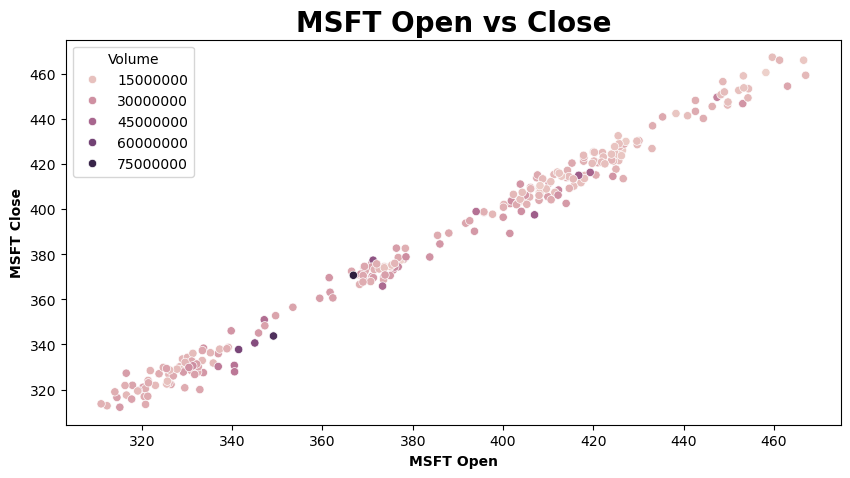

In [ ]:
# This code creates a scatter plot comparing microsoft's stock open and close data
plt.figure(figsize=(10,5))
sns.scatterplot(msft, x='Open', y='Close', hue = 'Volume')
plt.title('MSFT Open vs Close', fontsize = 20, weight= 'bold')
plt.ylabel('MSFT Close', fontsize = 10, weight = 'bold')
plt.xlabel('MSFT Open', fontsize = 10, weight = 'bold')

In [ ]:
# This code imports apple's stock data and changes the column titles
aapl = pd.read_excel(r'AAPL 1year.xlsx')
aapl.rename(columns={'Open': 'aapl_open', 'High':'aapl_high',
                    'Low': 'aapl_low', 'Close': 'aapl_close',
                    'Adj Close': 'aapl_adj', 'Volume': 'aapl_volume'},inplace=True)
aapl.head()

,Date,aapl_open,aapl_high,aapl_low,aapl_close,aapl_adj,aapl_volume
0,2023-07-21,194.100006,194.970001,191.229996,191.940002,190.926041,71917800
1,2023-07-24,193.410004,194.910004,192.250000,192.750000,191.731766,45377800
2,2023-07-25,193.330002,194.440002,192.919998,193.619995,192.597153,37283200
3,2023-07-26,193.669998,195.639999,193.320007,194.500000,193.472519,47471900
4,2023-07-27,196.020004,197.199997,192.550003,193.220001,192.199280,47460200


In [ ]:
# This creates a subset of microsoft and apple's adjusted close data
subset = pd.concat([msft['msft_adj'], aapl['aapl_adj']], axis=1)
subset.head()


,msft_adj,aapl_adj
0,341.101685,190.926041
1,342.431274,191.731766
2,348.255707,192.597153
3,335.148224,193.472519
4,328.152954,192.199280


Text(0.5, 0, 'Microsoft')

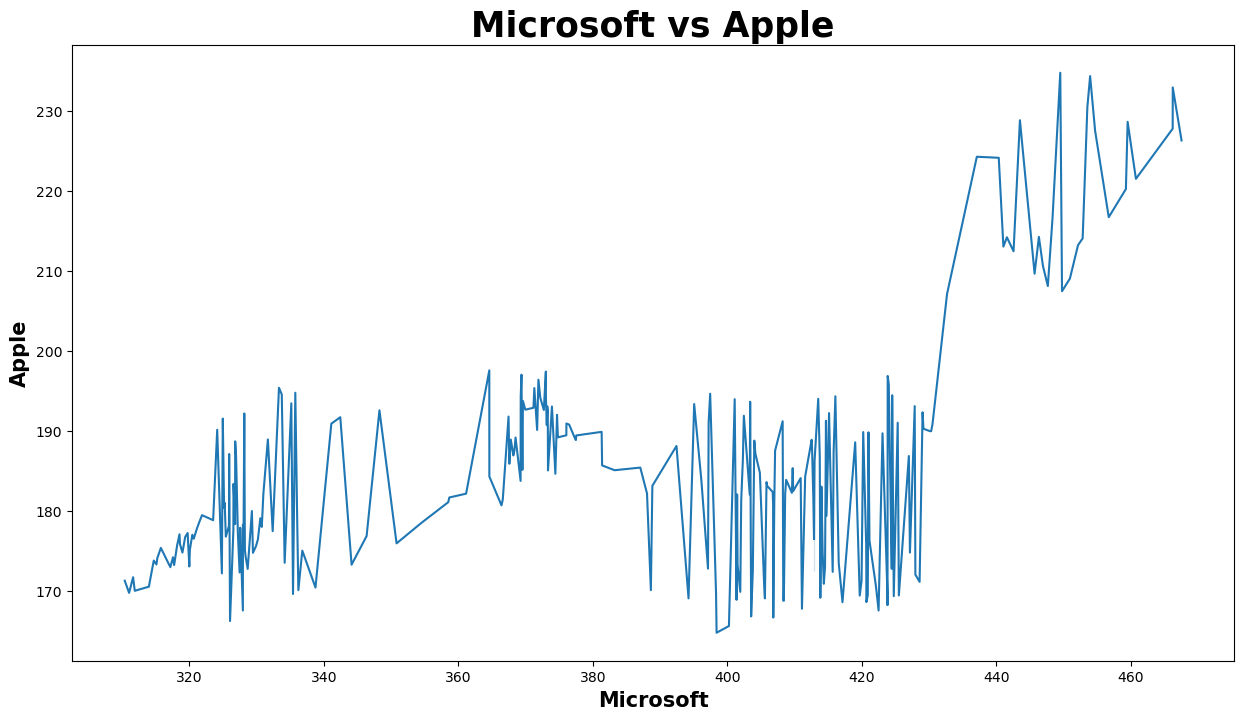

In [ ]:
# This code creates a line plot comparing microsoft and apple adjusted close
plt.figure(figsize=(15,8))
sns.lineplot(subset, x = 'msft_adj', y = 'aapl_adj')
plt.title('Microsoft vs Apple', fontsize= 25, weight = 'bold')
plt.ylabel('Apple', fontsize= 15, weight = 'bold')
plt.xlabel('Microsoft', fontsize= 15, weight = 'bold')